# Part 2

This exercise builds on the concepts of Finite Element Method that were introduced in Exercise 1. We will focus on solving a more complex problem, where the solution is a vector fields (instead of scalar) and we apply a combination of two different types of boundary conditions.

## Problem Description

Modelling displacement and stress is fundamental in engineering and geoscience, because it allows us to understand the material behaviour under various loads and conditions. Displacement captures the change in position of a point or body from the intial position due to forces. By accurately modeling displacement, we can compute stresses and determine whether a material will deform elastically, yield, or fracture under load. Finite Element Method is widely used to model the displacement and stresses in a domain. In engineering, it helps to ensure structural integrity of buildings, aircrafts etc. In geoscience, it is useful in modelling underground structures, such as tunnels, reserviours and modelling fracturing of subsurface.

In this exmaple we will model how a cantilever beam will deform when subjected to a point load.

Imagine we have a beam of length $L=60$ and height $2c = 3$ that is attached to a wall on one side and there is a load $P =80$ applied to the point on free hanging side. If the load is strong enough, the beam will bend. We can model that deformation using Finite Element Method, by solving for displacement


<img src="img/Cantilever_diagram.png" alt="Cantilever_diagram" width="600">

### Variational form of Linear Elasticity
#### Equation of Equilibrium 
To present the weak form of the governing equations for FEM, we must present the concepts of displacement, strain and stresses and how they relate to each other. 
- displacement ($u$) is the vector that describes the movement of a object 
- strain ($\varepsilon$) measures the deformation of an object due to applied loads
- stress ($\sigma$) measures the internal forces within the material due to the applied loads

In this example we assume linear elasticity relations, meaning that there is a linear relationship between stress and strain. This relationship is true for small deformations (i.e. displacement). However, it does not hold for large displacements, where non-linear relationship arises. 

The equation of equilibrium states that the sum of internal forces and the external forces must balance out. This equation can be expressed in terms of stress and specifically the two dimensional formulation in $x,y$-coordinates is:

$$ \nabla \cdot\sigma + \textbf{F} = 0$$
$$\Rightarrow
\begin{vmatrix} \frac{\partial}{\partial x} & \frac{\partial}{\partial y} \end{vmatrix} 
\begin{bmatrix}\sigma_x & \tau_{yx}\\
\tau_{xy} & \sigma_y
\end{bmatrix} =
\begin{bmatrix} Fx\\ F_y
\end{bmatrix}
$$

where $\nabla$ is the divergence operator $[\frac{\partial}{\partial x},\frac{\partial}{\partial y}]$, $\sigma$ represents the internal stress matrix: the $\sigma_x$ and $\sigma_y$ are normal stresses in directions $x$ and $y$ and $\tau_{xy}=\tau_{yx}$ is the shear stress.The $\textbf{F}$ is a body force per unit area, such as gravity and applied load. In our example we will assume no gravitational foreces, for simplicity. That reduces $F$ to forces equivalent to the applied load.

In literature the $2x2$ stress matrix $\sigma$ is often written as vector:
$$
\begin{equation}
\sigma=
\begin{bmatrix} 
\sigma_{x} \\ 
\sigma_{y} \\ 
\tau_{xy} 
\end{bmatrix}
\end{equation}
$$

Using this equation of equilibrium the variational form for Finite Elemeent Method can be derived. While we will not provide the full derivation due to its length, we will outline the key idea that lead to the final result.

#### Derivation of Variation Form
Since we are solving for displacement $u$, the variational form must take form in terms of displacement vector. Let us first deal with the left hand side of the equation, while the right hand side are the external stresses that are applied as boundary conditions. We will use the following relations and principle:

1. **small strain-displacement relation**:
    This relation expresses strain $\varepsilon$ in terms of displacement $u$
    $$
    \begin{equation}
    \begin{bmatrix} 
    \varepsilon_{xx} \\ 
    \varepsilon_{yy} \\ 
    \gamma_{xy} 
    \end{bmatrix}
    =
    \begin{bmatrix} 
    \frac{\partial u_x}{\partial x} \\ 
    \frac{\partial u_y}{\partial y} \\ 
    \frac{\partial x}{\partial y} + \frac{\partial u_y}{\partial x} 
    \end{bmatrix}
    =
    \begin{bmatrix} 
    \frac{\partial}{\partial x} & 0 \\ 
    0 & \frac{\partial}{\partial y} \\ 
    \frac{\partial x}{\partial y} & \frac{\partial u_y}{\partial x} 
    \end{bmatrix}
    \begin{bmatrix}
    u_x \\ u_y
    \end{bmatrix}
    \end{equation}
    $$

    where $u_x$ and $u_y$ is the displacemnt in $x$ and $y$ directions respectively and $\varepsilon$ is the strain of the object. It describes how much the object deforms in particular direction: the strains $\varepsilon_{xx}$ and $\varepsilon_{yy}$ measure how much the object streches in the $x$ and $y$ directions repectively, while the $\varepsilon_{xy}$ is the shear strain that measures how much the object distorts. 
    This equation is often written in form 
    $$\begin{equation}
    \varepsilon = \textbf{B}u
    \end{equation}
    $$
    
    
2. **small strain-stress relation** (Hooke's law for continuious domain) 
   This relation states that we can express stress $\sigma$ in terms of strain using the material stiffness marix $\textbf{D}$:

    $$\sigma = \textbf{D}\varepsilon$$
    
    The matrix $\textbf{D}$ is defined in section "Step 3. Matrix Assembly" below.


3. We apply the principle of virtual work (that states for an arbitrary small virtual displacement $\delta u$ the internal virtual work is equal to external virtual work). Therefore multiplying the equilibrium equation by the virtual displacement $\delta u$ and integrating over the domain $\Omega$ to calculate the total forces we have:
$$\int_\Omega \delta u^T(\nabla \cdot\sigma + \textbf{F})=0$$

Finally by applying the divergence theorem, which allows us to express the integral over the domain in terms of integral over the boundary with respect to normal $\textbf{n}$, to the principle of work states above and subsitituting the relations 1 and 2. We get the following variational form of equilibrium equation.
$$\int_\Omega \textbf{B}^T \textbf{D}\textbf{B} d\Omega = \int_{d\Gamma}\sigma \cdot \textbf{n}d\Gamma\$$
where $\textbf{D}$ is a material matrix from the strain-stress relation, $\textbf{B}$ is a derivative matrix of displacement $u$ from the strain-displacement relation and $\sigma$ are the external forces applied at normal $\textbf{n}$ around domain boundary $\Gamma$. The left-hand size of the equation is what we will be accumulating on the element-by-element basis into the global matrix $A$ and the right hand side are the boundary conditions.

As in Part 1 exercise, let us follow the same structure in setting up the problem.


##  Step 1. Domain Set Up and Meshing
The domain set up and meshing does not depend on the solution variable type (i.e. sclar/ vector). Hence this step is the same as in Part 1. 
The domain set up only depends on the refinement of the domain and type of elements we have to use. However, it is generally good to review the ODE/PDE that is being solving to understand the degree of the differential equation, as this will guide the element degree. In this example we will use elements of degree two. The function below will create and mesh the domain using the inputs provided below in the same way as in first example.


In [1]:
import sys
sys.path += [".", ".."]
from FEM_Module.FEM_Module_class import FEM_model

import matplotlib.pyplot as plt
import numpy as np
import os

from matplotlib.tri import Triangulation

### Exercise
Using the details below set up the boudaries of the domain:
- length in $x$ direction is $60$ from origin
- length in $y$ direction is $3$ and it is symmetric around the origin
- two dimensional problem

Then specify the type and size of elements that we want to use:
- quadratic elements
- element size = 2 

We can visualise this domain by using the function `visualise_mesh()` in module FEM_model .

In [ ]:
# ------------ User Input required --------------------#
## Domain Definition ##
x_start =
x_end = 
y_start = 
y_end = 
domain_dim = 


### Input Element Type 
element_degree =  # specify the element order
element_length =  # specify the domain refinement. Finer meshes lead to more accurate solution


# ------------ End of User Input  --------------------#


In [2]:
###########SOLUTION
########### The following inputs can be changed ################
## Domain Definition ##
x_start = 0
x_end = 60
y_start = -1.5
y_end = 1.5
domain_dim = 2


### Input Element Type 
element_degree = 1 # specify the element order
element_length = 0.5# specify the domain refinement. Finer meshes lead to more accurate solution

element_degree = 2# specify the element order
element_length = 1# specify the domain refinement. Finer meshes lead to more accurate solution



There are  1091  nodes in the mesh


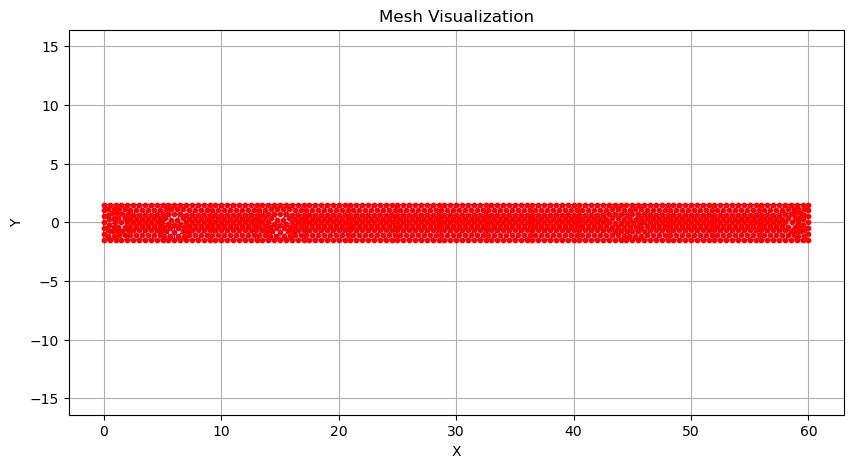

In [3]:
# Initialing the FEM model
FEM_ = FEM_model(domain_dim)

L=x_end- x_start
t=1
c=(y_end-y_start)/2.

## Create the domain name
FEM_.domain_mesh(element_degree, element_length, [x_start,x_end], [y_start,y_end])
print("There are ", FEM_.num_nodes," nodes in the mesh")
FEM_.visualise_mesh()

## Step 2. Key Element Functions

One of the key steps in Finite Element Method is applying the basis functions to assemble the linear system of equations that represent the weak form of the governing equation. The basis functions do not change depending on whether the solution is a vector or scalar field. However, the key difference lies in the solution field as detailed below. 
**Structure of the solution field**. 

In the previous exercise, temperature was treated as a scalar field, meaning each node had only a single associated value. Consequently, there was only one degree of freedom per node. However, when solving for vector fields, multiple degrees of freedom exist at each node because particles can move in multiple dimensions. This is reflected in the structure of the solution vector $u$. 
    
There are different ways to organize the solution vector, but it is crucial to maintain consistency in the chosen structure. One approach is to order by dimension, where all degrees of freedom in the $x$-direction appear first, followed by those in the $y$-direction. Alternatively, we can order by node ID, where each node's $x$- and $y$-components are stored consecutively. We adopt the second approach of node ordering, resulting in the following structure for solution vector $u$:
    
$$u=\begin{bmatrix} u^0_x\\ u^0_y \\  u^1_x\\ u^1_y\\... \\ u^m_x \\ u^m_y  \end{bmatrix}$$

where $u^i_x$ and $u^i_y$ represent the displacement in $x$ and $y$ directions at node $i$ and $m$ is the total number of nodes in the mesh. This structure must be  accounted for when assembling the element-level stiffness matrix into the global system matrix $A$.



## Step 3. Matrix Assembly

Recall that the left hand side of the weak form that we need to accumulate is 
$$\int_\Omega \textbf{B}^T \textbf{D}\textbf{B} d\Omega $$

Let us now define in more detail what the matrix $\textbf{B}$ and $\textbf{D}$ are. 

From "Problem Description" section we have defined the strain in terms of derivative of displacement using the **small strain-displacement relation**:
    $$
    \begin{equation}
    \begin{bmatrix} 
    \varepsilon_{xx} \\ 
    \varepsilon_{yy} \\ 
    \gamma_{xy} 
    \end{bmatrix}
    =
    \begin{bmatrix} 
    \frac{\partial}{\partial x} & 0 \\ 
    0 & \frac{\partial}{\partial y} \\ 
    \frac{\partial x}{\partial y} & \frac{\partial u_y}{\partial x} 
    \end{bmatrix}
    \begin{bmatrix}
    u_x \\ u_y
    \end{bmatrix}
    \end{equation}
    =\textbf{Bu}
    $$
Given that displacement $u$ in any element $e$ can be expressed as the linear combination of the nodes in that element:
$$u_x = \sum_{i=0}^n N^i u_x^i$$
where $N^i$ is the shape function local node $i$ and $n$ is the number of nodes in the element. Then the strain matrix above can be rewritten as :
 

\begin{equation}
\begin{bmatrix} 
\varepsilon_{xx} \\ 
\varepsilon_{yy} \\ 
\gamma_{xy} 
\end{bmatrix}
=
\begin{bmatrix} 
\frac{\partial N^1}{\partial x} & 0 & \frac{\partial N^2}{\partial x} & 0 &\cdots& \frac{\partial N^n}{\partial x} & 0\\
0 & \frac{\partial N^1}{\partial y} & 0 & \frac{\partial N^2}{\partial y} &\cdots& 0 &\frac{\partial N^n}{\partial y}\\
\frac{\partial N^1}{\partial y} & \frac{\partial N^1}{\partial x} & \frac{\partial N^2}{\partial y} &\frac{\partial N^2}{\partial x} &\cdots& \frac{\partial N^n}{\partial y} & \frac{\partial N^n}{\partial x}\\
\end{bmatrix}
\begin{bmatrix} u^0_x\\ u^0_y \\  u^1_x\\ u^1_y\\\vdots \\ u^n_x \\ u^n_y \end{bmatrix} = \textbf{B}u
\end{equation}

We have also previously defined strain-stress relation as 
$$\sigma = \textbf{D}\varepsilon$$
where matrix $\textbf{D}$ is 

\begin{equation}
\textbf{D} = \frac{E(1-\nu)}{(1+\nu)(1-2\nu)}
\bigg[
\begin{array}{cc} 
1 & \frac{\nu}{1-\nu}\\
\frac{\nu}{1-\nu} & \frac{1-2\nu}{2(1-\nu)}
\end{array}
\bigg]
\end{equation}

where $E$ and $\nu$ are the material properties: the Young's modulus and the Poisson ratio respectively.

### Exercise
Following the same structure as in part 1. Accumulate for an elemeent $e$ the following equation: $$\int_\Omega \textbf{B}^T \textbf{D}\textbf{B} d\Omega $$

Let Young's modulus be 1,000,000 Pa and Poisson's ratio 0.25 and matrices $\textbf{B}$ and $\textbf{D}$ as defined above. The structure for iterating over each element is given below. 

In [25]:
## Set up the material properties:

Youngs_modulus =1e6
Poisson_ratio = 0.25

## Set up empty matrix global matrix A and the right hand side vector b

num_nodes = len(FEM_.mesh.points)
A_matrix = np.zeros((num_nodes*domain_dim, num_nodes*domain_dim)) ## note that for each node there are 2 d.o.f
b = np.zeros((num_nodes*domain_dim,))

## Now we iterate through each element in the mesh in the same way before
for element in FEM_.element_list_2D:
    
    # ------------ User Input required ------------------------------------------#
    # -- Step 1. Set the integration points IP and their weights 
    IPs, IP_weights = ...

    # -- Step 2. Create empty LHS matrix for the element stiffness matrix ------------#
    # -- recall that variable element contains the list of the nodes and that each node has 2 d.o.f
    LHS = np.zeros((...
                    
    # -- Step 3. Set up for loop to iterate over each integration point ------------#
    for IP, weight in ...:
                    
        # -- Step 4. Get the list of corner nodes in the element and calculate
        # --------   the Jacobian matrix using function Jacobian in FEM_module
        e_nodes_xy = ...
        detJ, JMat = ...
        
        # -- Step 5. Calculate the derivative basis functions at the integration point 
        # --------   use the function basis_functions_der() and multiply it by the inverse of the Jacobian matrix
        der_matrix = 
        der_matrix_JInv = 
        
        # -- Step 6. Transform the derivative matrix into the B described above
        # --------  use the function dN_To2DOF() in FEM_module
        B = ...    
        # -- Step 7. Take the transpose of the matrix B
        BT = ..
        # -- Step 8. Calculate matrix D. You can use the function stiffness_matrix_2D in FEM module
        # --------   use the material properties Youngs_modulus and Poisson_ratio defined above
        D = 
        
        # -- Step 9. Multiply BT by D
        
        # -- Step 10. Multiply the matrix from Step 9 by B
        
        # -- Step 11. Multiply the final matrix by Jacobian determinant and weight of the integration point
        
        # -- Step 12. Add the resuling matrix to the element stiffness matrix LHS
                    
    # -- Step 13. Accumulate the element stiffness matrix LHS to global matrix A
    # ----------  The accumulation of the first d.o.f for the node is given as a hint
    for i in range(len(element)):
        for j in range(len(element)):
            col = int(element[i])
            row = int(element[j])
            A_matrix[row*domain_dim,col*domain_dim]+= LHS[int(j*domain_dim)][int(i*domain_dim)] # xx
            A_matrix[row*domain_dim,col*domain_dim+1]+=...
            A_matrix...
            A_matrix...

    # ------------ End of User Input ------------------------------------------#

SyntaxError: '(' was never closed (3179041996.py, line 21)

In [21]:
## Set up the material properties:

Youngs_modulus =1e6
Poisson_ratio = 0.25

## Set up empty matrix global matrix A and the right hand side vector b

num_nodes = len(FEM_.mesh.points)
A_matrix = np.zeros((num_nodes*domain_dim, num_nodes*domain_dim)) ## note that for each node there are 2 d.o.f
b = np.zeros((num_nodes*domain_dim,))

## Now we iterate through each element in the mesh in the same way before
for element in FEM_.element_list_2D:
    
    # ------------ User Input required ------------------------------------------#
    # -- Step 1. Set the integration points IP and their weights 
    IPs, IP_weights = FEM_.integrationPoints()

    # -- Step 2. Create empty LHS matrix for the element stiffness matrix ------------#
    # -- recall that variable element contains the list of the nodes and that each node has 2 d.o.f
    LHS = np.zeros((len(element)*domain_dim, len(element)*domain_dim)) 
                    
    # -- Step 3. Set up for loop to iterate over each integration point ------------#
    for IP, weight in zip(IPs,IP_weights):
                    
        # -- Step 4. Get the list of corner nodes in the element and calculate
        # --------   the Jacobian matrix using function Jacobian in FEM_module
        e_nodes_xy = FEM_.global_node_coords[element][:,:3]
        detJ, JMat = FEM_.Jacobian(IP, e_nodes_xy)
        
        # -- Step 5. Calculate the derivative basis functions at the integration point 
        # --------   use the function basis_functions_der() and multiply it by the inverse of the Jacobian matrix
        der_matrix = FEM_.basis_functions_der(IP)
        der_matrix_JInv = np.matmul(np.linalg.inv(JMat), der_matrix)
        
        # -- Step 6. Transform the derivative matrix into the B described above
        # --------  use the function dN_To2DOF() in FEM_module
        B = FEM_.dN_To2DOF(der_matrix_JInv) 
        # -- Step 7. Take the transpose of the matrix B
        BT =  B.transpose()
        # -- Step 8. Calculate matrix D. You can use the function stiffness_matrix_2D in FEM module
        # --------   use the material properties Youngs_modulus and Poisson_ratio defined above
        D = FEM_.stiffness_matrix_2D(Youngs_modulus,Poisson_ratio)        
        
        # -- Step 9. Multiply BT by D
        BT = np.matmul(BT, D)
        # -- Step 10. Multiply the matrix from Step 9 by B
        BT = np.matmul(BT, B)
        # -- Step 11. Multiply the final matrix by Jacobian determinant and weight of the integration point
        BT = BT * weight*(detJ) ## currently assume all the wieght of IP are the same
        # -- Step 12. Add the resuling matrix to the element stiffness matrix LHS
        LHS += BT     
    # -- Step 13. Accumulate the element stiffness matrix LHS to global matrix A
    # ----------  The accumulation of the first d.o.f for the node is given as a hint
    for i in range(len(element)):
        for j in range(len(element)):
            col = int(element[i])
            row = int(element[j])
            A_matrix[row*domain_dim,col*domain_dim]+= LHS[int(j*domain_dim)][int(i*domain_dim)] # xx
            A_matrix[row*domain_dim,col*domain_dim+1]+= LHS[int(j*domain_dim)][int(i*domain_dim+1)] # xy
            A_matrix[row*domain_dim+1,col*domain_dim]+= LHS[int(j*domain_dim+1)][int(i*domain_dim)] # y
            A_matrix[row*domain_dim+1,col*domain_dim+1]+= LHS[int(j*domain_dim+1)][int(i*domain_dim+1)] # y

            
    # ------------ End of User Input ------------------------------------------#

<details>
<summary>Solution</summary>
    Solution code. Copy from here >
    ```

Youngs_modulus =1e6
Poisson_ratio = 0.25

# Set up empty matrix global matrix A and the right hand side vector b

num_nodes = len(FEM_.mesh.points)
A_matrix = np.zeros((num_nodes*domain_dim, num_nodes*domain_dim)) ## note that for each node there are 2 d.o.f
b = np.zeros((num_nodes*domain_dim,))

# Now we iterate through each element in the mesh in the same way before
for element in FEM_.element_list_2D:
    
    # ------------ User Input required ------------------------------------------#
    # -- Step 1. Set the integration points IP and their weights 
    IPs, IP_weights = FEM_.integrationPoints()

    # -- Step 2. Create empty LHS matrix for the element stiffness matrix ------------#
    # -- recall that variable element contains the list of the nodes and that each node has 2 d.o.f
    LHS = np.zeros((len(element)*domain_dim, len(element)*domain_dim)) 
                    
    # -- Step 3. Set up for loop to iterate over each integration point ------------#
    for IP, weight in zip(IPs,IP_weights):
                    
        # -- Step 4. Get the list of corner nodes in the element and calculate
        # --------   the Jacobian matrix using function Jacobian in FEM_module
        e_nodes_xy = FEM_.global_node_coords[element][:,:3]
        detJ, JMat = FEM_.Jacobian(IP, e_nodes_xy)
        
        # -- Step 5. Calculate the derivative basis functions at the integration point 
        # --------   use the function basis_functions_der() and multiply it by the inverse of the Jacobian matrix
        der_matrix = FEM_.basis_functions_der(IP)
        der_matrix_JInv = np.matmul(np.linalg.inv(JMat), der_matrix)
        
        # -- Step 6. Transform the derivative matrix into the B described above
        # --------  use the function dN_To2DOF() in FEM_module
        B = FEM_.dN_To2DOF(der_matrix_JInv) 
        # -- Step 7. Take the transpose of the matrix B
        BT =  B.transpose()
        # -- Step 8. Calculate matrix D. You can use the function stiffness_matrix_2D in FEM module
        # --------   use the material properties Youngs_modulus and Poisson_ratio defined above
        D = FEM_.stiffness_matrix_2D(Youngs_modulus,Poisson_ratio)        
        
        # -- Step 9. Multiply BT by D
        BT = np.matmul(BT, D)
        # -- Step 10. Multiply the matrix from Step 9 by B
        BT = np.matmul(BT, B)
        # -- Step 11. Multiply the final matrix by Jacobian determinant and weight of the integration point
        BT = BT * weight*(detJ) ## currently assume all the wieght of IP are the same
        # -- Step 12. Add the resuling matrix to the element stiffness matrix LHS
        LHS += BT     
    # -- Step 13. Accumulate the element stiffness matrix LHS to global matrix A
    # ----------  The accumulation of the first d.o.f for the node is given as a hint
    for i in range(len(element)):
        for j in range(len(element)):
            col = int(element[i])
            row = int(element[j])
            A_matrix[row*domain_dim,col*domain_dim]+= LHS[int(j*domain_dim)][int(i*domain_dim)] # xx
            A_matrix[row*domain_dim,col*domain_dim+1]+= LHS[int(j*domain_dim)][int(i*domain_dim+1)] # xy
            A_matrix[row*domain_dim+1,col*domain_dim]+= LHS[int(j*domain_dim+1)][int(i*domain_dim)] # y
            A_matrix[row*domain_dim+1,col*domain_dim+1]+= LHS[int(j*domain_dim+1)][int(i*domain_dim+1)] # y

    ```
    Pas
</details>

## Step 4. Apply Boundary Conditions

Let us now deal with the right hand side of the equation
$$\int_\Omega \textbf{B}^T \textbf{D}\textbf{B} d\Omega = \int_{d\Gamma}\sigma \cdot \textbf{n}d\Gamma\$$. 

As mentioned previously $\Gamma$ is the boundary of the domain and $\sigma$ are the stresses acting due to load in the direction $n$ normal to boudnary, therefore the right hand side forms a boundary condition, known as Neumann boundary condition.

#### Dirichlet Boundary Conditions
There are several types of boundary conditions that exist for differential equations. In previous notebook we applied Dirichlet boudnary conditions, where we know the value of a solution $u$ at specific points. Therefore we are able to set the solution nodes at those points to that value. These boundary conditions usually are writtes as

$$u_x(L,0)=0, u_y(L,0)=0,$$

meaning that the solution is $0$ for both $u_x$ and $u_y$ degrees of freedom at the point $(L,0)$ in global coordinates.


#### Neumann Boundary Conditions
Another common type of boundary condition is the Neumann boundary condition, which is applied in this case. This condition specifies the derivative of the solution at certain points rather than the solution value itself. For instance, applying a load or force to the domain, as seen in this example, is a typical Neumann boundary condition. In such cases, the exact solution value at the boundary is unknown; instead, we only have information about how it behaves relative to adjacent nodes. As a result, we cannot directly assign a specific value to the right-hand side vector as before, requiring a different approach

In FEM, when assembling the left-hand side matrix, our goal is to approximate the behavior of the differential equation on an element-by-element basis. To capture the behavior of the derivative at a boundary, we follow the same principle but apply it along the boundary elements. These boundary elements are always one dimension lower than the domain elements; in this case, they are line elements with three nodes per element, as illustrated below

<img src="img/line_element_diag.png" alt="line_eleemt" width="300">

We follow similar process of accumulation for every element at the boundary using one-dimensional basis function and we add it to the RHS vector $b$ instead of the matrix $A$.

Note: for numerical simulations it is insufficient to use only Neumann boundary conditions. Due to the nature of setting the Neumann boundary conditions that requires integration, there can be arbitraty many solutions unless we specify solutions at certain points using the Dirichlet boundary conditions.

#### Cantilever Example
In our example we have a combination of boundary conitions, on the left is the Neumann boundary conditions due to the force being applied and on the right is the Dirichlet boundary condition due to the cantilever being fixed to the wall at three points and it cannot move.

$$u_x(L,0)=0, u_y(L,0)=0, u_x(L,c)=u_x(L,+c)=0$$

For Neumann boundary condition, the load $P$ is applied at the point on the cantilever and we need to express it in terms of forces acting in the $x$ and $y$ directions. This can be done by using traction vector $\textbf{t}$, that leads to the following formulation:

$$\int_{d\Gamma}\sigma \cdot \textbf{n} 
d\Gamma = \int_{d\Gamma} N\cdot\textbf{t}d\Gamma$$. 

where $\textbf{t}$ is the traction vector defined as 
$$\textbf{t} = \begin{bmatrix}\textbf{t}_x \\ \textbf{t}_y \end{bmatrix} =
\begin{bmatrix} 0 \\-\frac{3P}{4c}\left[1-\left(\frac{y}{c}\right)^2\right]\end{bmatrix}$$

and $N$ is a matrix of line element shape functions:
$$N = 
\begin{bmatrix} N_1 & 0 \\ 0 & N_1 \\\vdots & \vdots \\N_n & 0 \\0 & N_n \end{bmatrix}$$

#Add a reference here




### Exercise

Identify the nodes and line elements on the right and left boundaries. Recall that the left boundary lies along the line $x=0$ and the right is along the line $x=L$.

Hint: you can `mesh.point` to find a list of global coordinates for all the nodes and you can use `numpy` functions `np.where` and `np.isclose` to check which points lie on the left and right boundaries based on their $x$ coordinates

In [5]:
# ------------ User Input required ------------------------------------------#
nodes_on_left_ = 
nodes_on_right_ =

# ------------ End of User Input ------------------------------------------#
    
# Find line elements that have all nodes the list of nodes_on_left_ boundary
result = np.all(np.isin(FEM_.mesh.cells_dict['line3'], nodes_on_left_), axis=1)
elements_left_=FEM_.mesh.cells_dict['line3'][np.where(result)[0]]

# Find line elements that have all nodes the list of nodes_on_left_ boundary
result = np.all(np.isin(FEM_.mesh.cells_dict['line3'], nodes_on_right_), axis=1)
elements_right_=FEM_.mesh.cells_dict['line3'][np.where(result)[0]]

print("The list of elements on the left boundary are\n", elements_left_)
print("The list of elements on the right boundary are\n", elements_right_)

SyntaxError: invalid syntax (81608762.py, line 2)

In [22]:
# ------------ User Input required ------------------------------------------#
nodes_on_left_ = np.where(np.isclose(FEM_.mesh.points[:,0], x_start))[0]
nodes_on_right_ =np.where(np.isclose(FEM_.mesh.points[:,0], x_end))[0]


# ------------ End of User Input ------------------------------------------#
    
# Find line elements that have all nodes the list of nodes_on_left_ boundary
if FEM_.degree == 1:
    element_types = "line"
elif FEM_.degree == 2:
    element_types = "line3"
    
result = np.all(np.isin(FEM_.mesh.cells_dict[element_types], nodes_on_left_), axis=1)
elements_left_=FEM_.mesh.cells_dict[element_types][np.where(result)[0]]

# Find line elements that have all nodes the list of nodes_on_left_ boundary
result = np.all(np.isin(FEM_.mesh.cells_dict[element_types], nodes_on_right_), axis=1)
elements_right_=FEM_.mesh.cells_dict[element_types][np.where(result)[0]]

print("The list of elements on the left boundary are\n", elements_left_)
print("The list of elements on the right boundary are\n", elements_right_)

The list of elements on the left boundary are
 [[  3 247 249]
 [247 248 250]
 [248   0 251]]
The list of elements on the right boundary are
 [[  1 123 125]
 [123 124 126]
 [124   2 127]]



### Exercise. Accumulate the Neumann Boundary Condition
Using the equation of the external forces in terms of traction apply the Neumann boundary conditions along the left boundary. Recall that we apply 

$$\int_{d\Gamma} N\cdot\textbf{t}d\Gamma$$  

where $N$ are the line shape functions and traction vector $t$ is
$$\textbf{t} = \begin{bmatrix}\textbf{t}_x \\ \textbf{t}_y \end{bmatrix} =
\begin{bmatrix} 0 \\-\frac{3P}{4c}\left[1-\left(\frac{y}{c}\right)^2\right]\end{bmatrix}$$

and we use Gaussian integration for line elements. 

Hint: The basis function for one-dimention quadratic elements are given below along with the suitable integration points and the Jacobian.

In [23]:
def basis_fun_line_quad(point):
    r = point
    N=np.zeros(3)
    N[0] = 0.5*(r*r +r) 
    N[1] = 0.5*(r*r -r)
    N[2] = 1-r*r
    return N

def der_basis_fun_line_quad(point):
    r = point
    dN=np.zeros(3)
    dN[0] = r+0.5
    dN[1] = r-0.5
    dN[2] = -2*r
    return dN


def Integration_points_1D():
    IP_line = [-1/np.sqrt(3.),  1/np.sqrt(3.)]
    IP_w = [1.,1.]
    return IP_line, IP_w


def Jacobian_1D(pt, element_xy_coord):
    dN = der_basis_fun_line_quad(pt)
    x_vals=element_xy_coord[:,1]
    return np.dot(dN,x_vals )
   

In [24]:
# set force value
P = 80
b = np.zeros((num_nodes*domain_dim,))
# Iterate through all the elements on the left boundary
for element in elements_left_: 

    # ------------ User Input required ------------------------------------------#
    # -- Step 1. Set the integration points IP and their weights for 1D element
    IPs, IP_weights = Integration_points_1D()

    # -- Step 2. Create empty RHS vector for element level force accumulation ------------#
    # -- recall that variable element contains the list of the nodes and that each node has 2 d.o.f
    RHS = np.zeros((len(element)*domain_dim)) 

    # -- Step 3. Set up for loop to iterate over each integration point ------------#
    for IP, weight in zip(IPs,IP_weights):

        # take the y-coordinate of the middle node as the average of the element
       # y_value_ = FEM_.mesh.points[element[2]][1] 
        y_value_ = 0.5*(FEM_.mesh.points[element[0]][1] +\
                        FEM_.mesh.points[element[1]][1])
        
        # initialise the empy traction vector in x- and y-directions respectively
        traction = [0,0]
        # set the traction in the x-direction
        traction[0]= 0.
         # calculate the traction in y-direction
        traction[1] = (3. / 4.) * (P / c) * (1. - pow((y_value_ / c), 2))

        # -- Step 4. Get the list of corner nodes in the element and calculate
        # --------   the Jacobian matrix in 1D using function Jacobian_1D
        e_nodes_xy = FEM_.global_node_coords[element][:,:3]
        detJ = Jacobian_1D(IP, e_nodes_xy)
        # -- Step 5. Calculate the basis functions of 1D element
        N = basis_fun_line_quad(IP)
    
        # -- Step 6. Create an empty vector for adjusted shape functions
        Nnc = np.zeros(len(N)*domain_dim) 
        
        # -- Step 7. Adjust the basis function vector for 2 d.o.f 
        # ---------   and multiply by the traction force in that direction
        # iterate through all the nodes in element
        for node_i in range(len(N)):
            # for each node consider two degrees of freedom
            for dof in range(domain_dim):  # for every dimension
                    Nnc[node_i * 2 + dof] += N[node_i] * traction[dof]
        # -- Step 8. Multiply the vector by determinant and the integration point weight
        Nnc = Nnc* weight * (detJ) 
        
        # add to the RHS vector for accumulation
        RHS+=Nnc
        
    # add the element level RHS vector to the global RHS vector b
    for i in range(len(element)):
        node = int(element[i])
        b[node*domain_dim] += RHS[i*domain_dim]
        b[node*domain_dim+1] += RHS[(i*domain_dim)+1]


### Exercise. Add the Dirichlet Boundary Conditions
Apply the Dirichlet boundary conditions on the right hand side:

$$u_x(L,0)=0$$,
$$u_y(L,0)=0$$,  
$$u_x(L,c)=u_x(L,+c)=0$$

We apply these in the exact same way as in exercise in Part 1, but keep in mind that for each node first is $u_x$ displacement followed by $u_y$.

In [85]:
# check all the nodes along the right boundary
for node in nodes_on_right_:
    
    # get the global coordinate of each node
    x_val = FEM_.mesh.points[node][0]
    y_val = FEM_.mesh.points[node][1]
    # ------------ User Input required ------------------------------------------#
    
    # -- Step 1. Check if y coordinate is equal to 0
    if(...):
        
        # -- Step 2. Set the b vector to 0 at both (x- and y-) degrees of freedom of that node
        # ---------  Hint. Do not forget to set the A_matrix rows to identity row
        
        # ------ x-direction
        A_matrix...
        A_matrix...
        b...
        
        # ------ y-direction
        A_matrix...
        A_matrix...
        b...


    # -- Step 3. Check if y coordinate is equal to either c or -c
    if(...):
        
        # -- Step 4. Set the b vector to 0 at degrees of freedom  in x-direction for that node
        # ---------  Hint. Do not forget to set the A_matrix rows to identity row
        A_matrix...
        A_matrix...
        b...



SyntaxError: invalid syntax (4062774324.py, line 16)

In [25]:
# check all the nodes along the right boundary
for node in nodes_on_right_:
    
    # get the global coordinate of each node
    x_val = FEM_.mesh.points[node][0]
    y_val = FEM_.mesh.points[node][1]
    # ------------ User Input required ------------------------------------------#
    
    # -- Step 1. Check if y coordinate is equal to 0
    if(np.isclose(y_val,0)):
        
        # -- Step 2. Set the b vector to 0 at both (x- and y-) degrees of freedom of that node
        # ---------  Hint. Do not forget to set the A_matrix rows to identity row
        A_matrix[node*2,:] = 0
        A_matrix[node*2, node*2] = 1
        b[node*2 ] = 0

        A_matrix[node*2+1,:] = 0
        A_matrix[node*2+1, node*2+1] = 1
        b[node*2 ] = 0


    # -- Step 3. Check if y coordinate is equal to either c or -c
    if(np.isclose(abs(y_val),c)):
        
        # -- Step 4. Set the b vector to 0 at degrees of freedom  in x-direction for that node
        # ---------  Hint. Do not forget to set the A_matrix rows to identity row
        A_matrix[node*2,:] = 0
        A_matrix[node*2, node*2] = 1
        b[node*2 ] = 0



## Step 4. Solve the Linear System of Equations

In [26]:
## solve the linear systme of equations
x = FEM_.solve(A_matrix, b)


## Step 5. Solution Analysis
Final step in running a numerical simulation is evaluating the results. 

Similarly to the exercise with temperature we view the solution in Paraview using a `vtk` output. We will use the function `write_vtk` to create a `vtk` file. Opening it in Paraview we can  use the "Warp by Vector" function to see how the cantilever is expected to deform: the white outline shows the original cantilever and the grey shape is the cantilever after load is applied.

<img src="img/cantilever_result.png" alt="cantilever_result" width="500">


In [22]:
FEM_.write_vtk("displacement", "vector", "cantilever_results.png")

### Solution Sample
Viewing the solution in Paraview using `vtk` files shows the general behaviour of the beam. It is good for sense checking the solution to make sure there is nothing obviously wrong, but it doesn't show how accurate the solution. 

We can also plot the displacement along a line in the beam and compare against the analytical solution, which is coded in the FEM_model class. 
Let us arbitrarily choose the top boundary for plotting, the code below identifies the nodes along the top boundary and finds the analytical solution for displacement in $x$ and $y$ direction. The results from the FEM solution is plotted against the analytical solutions. 

You can change the variable `test_line_though` below to identify a different line through the cantilever.


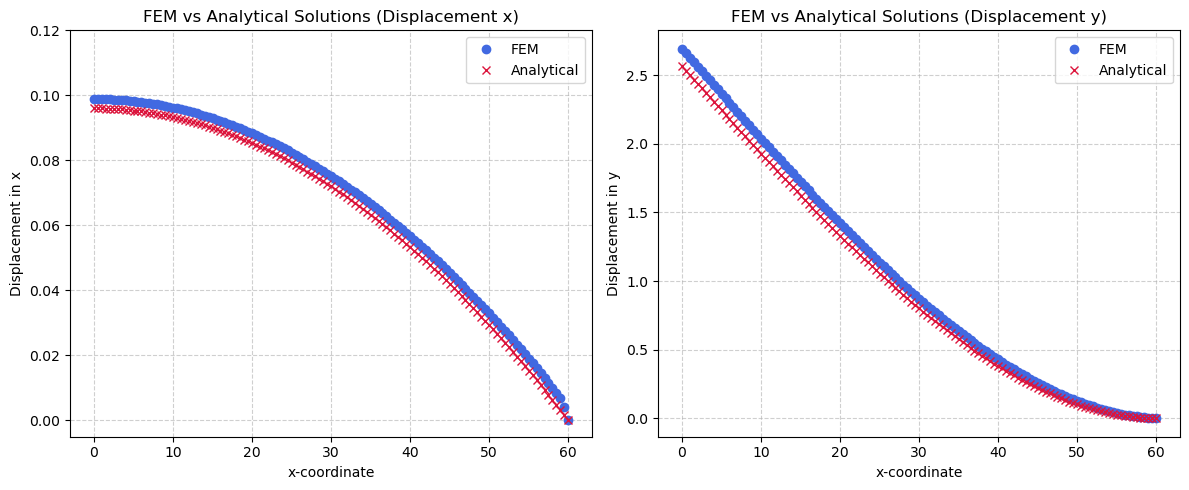

In [27]:
# ------------ User Input required ------------------------------------------#
test_line_though = 1.5


# ------------ End of Input  -------------------------------------------------#
    
# Identify the nodes on the top boundary, i.e. where the y0coordinate is equal to c=1.5
nodes_on_line_ = np.where(np.isclose(FEM_.mesh.points[:,1],test_line_though))[0]

# Initialise empty arrays to store the numerical and analytical solutions
analytical_solution_x =np.empty((0,2))
FEM_solution_x =np.empty((0,2))

analytical_solution_y =np.empty((0,2))
FEM_solution_y =np.empty((0,2))

# Iterate through the sampling nodes
for node in nodes_on_line_:
    # find the global coordinates for the node
    x_val = round(FEM_.mesh.points[node][0],5)
    y_val = round(FEM_.mesh.points[node][1],5)
    
    ## get the numerical and analytical solutions for displacement in x
    FEM_x = x[node*2]
    analytical_x = FEM_.analytical_solution_x(x_val,y_val,P,L,Youngs_modulus,Poisson_ratio,c,t)
    
    ## get the numerical and analytical solutions for displacement in y
    FEM_y = x[node*2+1]
    analytical_y = FEM_.analytical_solution_y(x_val,y_val,P,L,Youngs_modulus,Poisson_ratio,c,t)
    
    # append the the list of solutions for plotting
    analytical_solution_x=np.append(analytical_solution_x,[[x_val,analytical_x]], axis = 0)
    analytical_solution_y=np.append(analytical_solution_y,[[x_val,analytical_y]], axis = 0)
    
    FEM_solution_x=np.append(FEM_solution_x,[[x_val,FEM_x]], axis=0)
    FEM_solution_y=np.append(FEM_solution_y,[[x_val,FEM_y]], axis=0)
    
## Plot the numerical and analytical solution

# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

# First subplot (Displacmenet in X)
axes[0].plot(FEM_solution_x[:, 0], FEM_solution_x[:, 1], "o", color="royalblue", markersize=6, label="FEM")
axes[0].plot(analytical_solution_x[:, 0], analytical_solution_x[:, 1], "x", color="crimson", markersize=6, label="Analytical")
axes[0].set_xlabel("x-coordinate")
axes[0].set_ylabel("Displacement in x")
axes[0].set_title("FEM vs Analytical Solutions (Displacement x)")
axes[0].legend()
axes[0].grid(True, linestyle="--", alpha=0.6)
axes[0].set_ylim([-0.005, 0.12])  

# Second subplot (Displacmenet in Y)
axes[1].plot(FEM_solution_y[:, 0], FEM_solution_y[:, 1], "o", color="royalblue", markersize=6, label="FEM")
axes[1].plot(analytical_solution_y[:, 0], analytical_solution_y[:, 1], "x", color="crimson", markersize=6, label="Analytical")
axes[1].set_xlabel("x-coordinate")
axes[1].set_ylabel("Displacement in y")
axes[1].set_title("FEM vs Analytical Solutions (Displacement y)")
axes[1].legend()
axes[1].grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()


From the graphs above we can see that the Finite Element solution is close to the analytical solution. Note that the largest differences are at the left boundary where we specified the Neumann boundary condition, while on the right boundary the solution matches exactly, where we have Dirichlet boundary condition.

While this type of solution review is useful. It doesn't quantify the error or show if there is an issue elsewhere. Therefore, it is also good practice to perform error analysis and asses the error across all nodes. 

### Error Analysis
There are several ways to calculate the errors in numerical solutions with different types of errors suited for different situations. The most common errors:
- Max error: the maximum error in the simulation:
$$\max_i(|x_{approx,i} - x_{true,i}|)$$
- Absolute error: absolute difference between approximate solution and true solution. Best used where all values are of the same magnitude and scale.
$$\|e\|_1 = \frac{1}{n}\sum_{i=1}^{n}(|x_{approx_i} - x_{true_i}|)$$
- Relative error: the difference between the numerical solution and true solution are normalised by the magnitude of the true solution. This is used in cases where the values are of different magnitudes. However, if the true solution is zero for any of the nodes or has very small values, this formulation will cause issues.
$$e_r=\frac{1}{n}\sum_{i=1}^{n}(\frac{|x_{approx_i} - x_{true_i}|}{|x_{true_i}|})$$
- MSE error (Mean Square Error). This calculates the magnitude of the errors with focus on the errors of large magnitude:
$$
\|e\|_2 = \frac{1}{n}{\sum_{i=1}^{n} (x_{\text{approx},i} - x_{\text{true},i})^2}
$$

The goal of the error analysis is to understand how the error is changing as we refine the mesh. We expect the numerical solution to converge to the analytical solution for finer meshes, and the error to reduce. We have prepared a module `Run_Cantilever_Example` takes contains all the required functions to run the whole exercise from step 1 to step 4. This allows to solve the problem and calculate the errors in one `for` loop, while iterating over the different element sizes. 

#### Exercise 
Import the module `Run_Cantilever_Example` and set up the for loop simulate the cantilever problem for mesh with element sizes of 4,2, 1.45, 0.9 and 0.6. For each mesh calculate the following errors:
- max
- average absolute error
- MSE error


In [4]:
# Setting problem input
L=x_end- x_start
P=80
Youngs_modulus = 1e6
Poisson_ratio = 0.25

In [5]:
from FEM_Module.Run_Cantilever_Example import Run_Cantilever

# ------------ User Input required ------------------------------------------#

element_sizes=[2.2,2,1.45,0.9]

# ------------ End of User Input  ------------------------------------------#

errors_summary_x = np.empty((0,4))
errors_summary_y = np.empty((0,4))

for element_size in element_sizes:
    
    FEM_ = Run_Cantilever(domain_dim)

    ## Create the domain name
    FEM_.domain_mesh(element_degree, element_size, [x_start,x_end], [y_start,y_end])
    FEM_.accumulate_global_matrix(Youngs_modulus, Poisson_ratio)
    FEM_.apply_BC_NeumannDirich(P)
    FEM_.solve(FEM_.A_matrix,FEM_.b)

    ## Calculate the error
    x = FEM_.x
    
    # Set up empty containers for errors
    error_abs = np.empty((0,2))
    error_mse = np.empty((0,2))
    y_sol = np.empty((0,3))
    x_sol = np.empty((0,3))
    
    for node_ID in range(len(FEM_.mesh.points)):
        x_val, y_val = FEM_.mesh.points[node_ID][0],FEM_.mesh.points[node_ID][1]

        # Get analytical solution for the node
        analytical_disp_x = FEM_.analytical_solution_x(x_val,y_val,P,L,Youngs_modulus,Poisson_ratio,c,t)
        analytical_disp_y = FEM_.analytical_solution_y(x_val,y_val,P,L,Youngs_modulus,Poisson_ratio,c,t)

        # ------------ User Input required ------------------------------------------#
        # Get the numerical displacement at the node from solution vector x
        numerical_disp_x = x[node_ID * domain_dim]
        numerical_disp_y = x[node_ID * domain_dim + 1]

        # Absolute error:
        error_x = abs(numerical_disp_x-analytical_disp_x)
        error_y = abs(numerical_disp_y-analytical_disp_y)
        
        error_abs=np.append(error_abs,[[error_x,error_y]], axis = 0)
        
        # MSE error:
        error_x = pow((numerical_disp_x-analytical_disp_x),2)
        error_y = pow((numerical_disp_y-analytical_disp_y),2)
        
        error_mse = np.append(error_mse,[[error_x,error_y]], axis = 0)

        # ------------ End of User Input  ------------------------------------------#
        
    print("For mesh with element sizes ", element_size)
    print("There are", len(FEM_.mesh.cells_dict['triangle6']), "elements")
    print("The absolute errors are:", f"{np.mean(error_abs[:,0]):.4f}", f"{np.mean(error_abs[:,1]):.4f}")
    print("The max errors are:", f"{np.max(error_abs[:,0]):.4f}", f"{np.max(error_abs[:,1]):.4f}")
    print("The MSE errors are:", f"{np.mean(error_mse[:,0]):.8f}", f"{np.mean(error_mse[:,1]):.8f}")
    print()

    errors_summary_x = np.append(errors_summary_x,[[len(FEM_.mesh.cells_dict['triangle6']), np.max(error_abs[:,0]),\
                                                   np.mean(error_abs[:,0]),np.mean(error_mse[:,0])]], axis = 0)

    errors_summary_y = np.append(errors_summary_y,[[len(FEM_.mesh.cells_dict['triangle6']), np.max(error_abs[:,1]),\
                                                   np.mean(error_abs[:,1]),np.mean(error_mse[:,1])]], axis = 0)
    
#     errors_summary_x = np.append(errors_summary_x,[[len(FEM_.mesh.points), np.max(error_abs[:,0]),\
#                                                    np.mean(error_abs[:,0]),np.mean(error_mse[:,0])]], axis = 0)

#     errors_summary_y = np.append(errors_summary_y,[[len(FEM_.mesh.points), np.max(error_abs[:,1]),\
#                                                    np.mean(error_abs[:,1]),np.mean(error_mse[:,1])]], axis = 0)

For mesh with element sizes  2.2
There are 118 elements
The absolute errors are: 0.0036 0.1046
The max errors are: 0.0078 0.2423
The MSE errors are: 0.00001903 0.01670983

For mesh with element sizes  2
There are 122 elements
The absolute errors are: 0.0032 0.0913
The max errors are: 0.0072 0.2168
The MSE errors are: 0.00001567 0.01278845

For mesh with element sizes  1.45
There are 260 elements
The absolute errors are: 0.0017 0.0622
The max errors are: 0.0036 0.1181
The MSE errors are: 0.00000399 0.00509172

For mesh with element sizes  0.9
There are 548 elements
The absolute errors are: 0.0014 0.0610
The max errors are: 0.0045 0.1013
The MSE errors are: 0.00000300 0.00457691



Plotting the errors is useful way of visualising the convergence of the numerical solution to analytical one. As the number of elements in the mesh increases, we expect the errors to decrease. It is also important to examine different types of errors, as each has its own strengths and weaknesses. For instance, the maximum error is easy to compute but can be unstable since it is based on a single value. In the plot below, we observe a general reduction in errors. However, because the errors are becoming very small, a slight increase in a single value can cause the maximum error to rise, which may be misleading.

It is also essential to consider the trade-off between improved accuracy and increased computational cost. For the last two element sizes, 0.9 and 0.6, the number of elements doubles, yet the reduction in all errors is only marginal. Further error reduction would require doubling the elements again, but the error convergence graphs indicate that the solution is nearly converged. Therefore, refining the mesh further may not be worthwhile due to the additional computational time and cost.

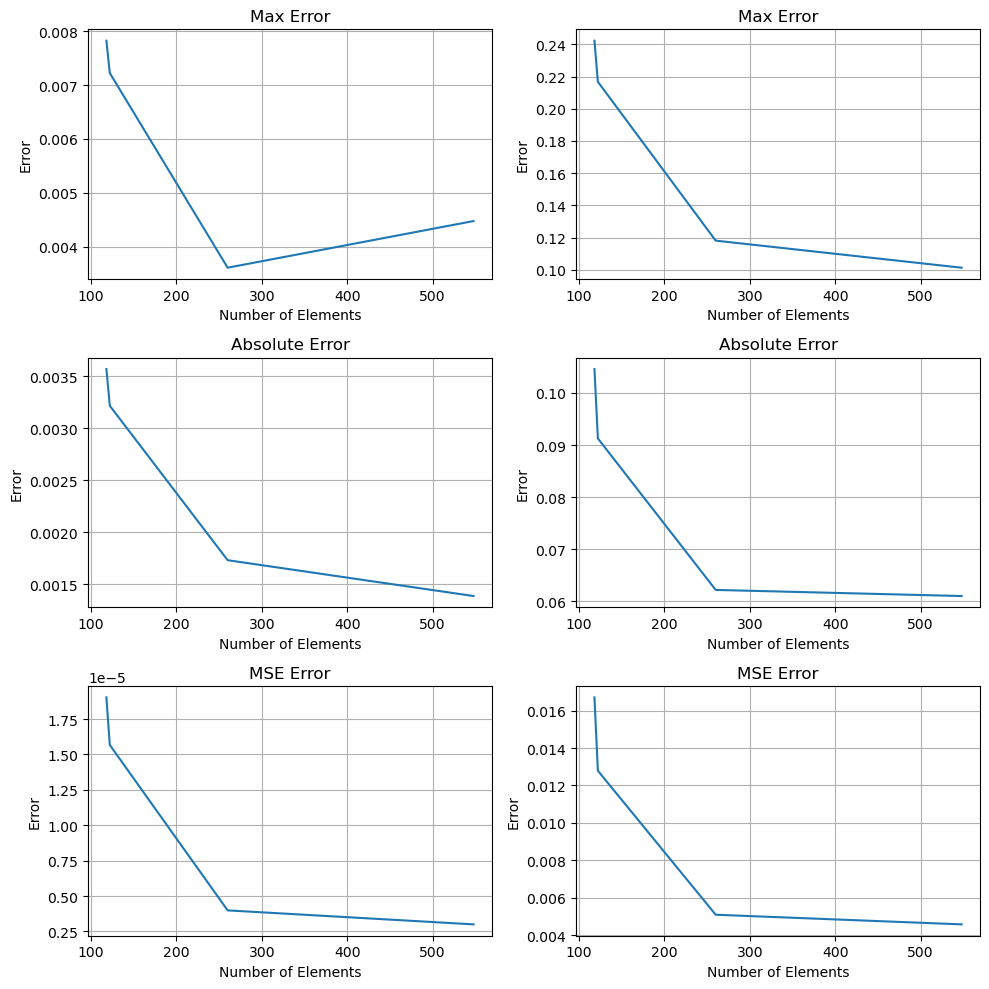

In [6]:
fig, axes = plt.subplots(3, 2, figsize=(10, 10))

# Define row titles for subtitles
row_titles = ["Max Error", "Absolute Error", "MSE Error"]

for fig_num in range(1, 4):
    axes[fig_num - 1][0].plot(errors_summary_x[:, 0], errors_summary_x[:, fig_num])
    axes[fig_num - 1][1].plot(errors_summary_y[:, 0], errors_summary_y[:, fig_num])
    for col in range(2):
    # Set subtitles for each row
        axes[fig_num - 1][col].set_title(row_titles[fig_num - 1])
        axes[fig_num - 1][col].set_xlabel("Number of Elements")
        axes[fig_num - 1][col].set_ylabel("Error")
        axes[fig_num - 1][col].grid(True)
        

plt.tight_layout()
plt.show()


### Neumann BC vs Dirichlet BC

Neumann boundary conditions are often unavoidable when solving physical problems. However, it is crucial to understand their impact on the system. To illustrate this, we revisit the cantilever beam example using the same element sizes (with addition of coarse size eleemnt 3.0) as before but replace the Neumann boundary conditions with Dirichlet boundary conditions. Although the problem setup does not specify displacement on the left boundary, we can use the analytical solution to prescribe these values as Dirichlet boundary conditions instead of Neumann. This approach allows us to directly compare how the choice of boundary conditions influences the error in the solution.

The graphs below show that for the problem with Neumann boundary conditions, the mesh required refinement to achieve convergence, with an element size of 3.0 proving too coarse. In contrast, with Dirichlet boundary conditions, the solution converged immediately, even for the coarsest mesh. This difference arises because Dirichlet boundary conditions directly constrain the solution by fixing certain values and removing the corresponding degrees of freedom. In comparison, Neumann boundary conditions impose constraints on the derivatives rather than the solution itself, making convergence more dependent on mesh refinement.

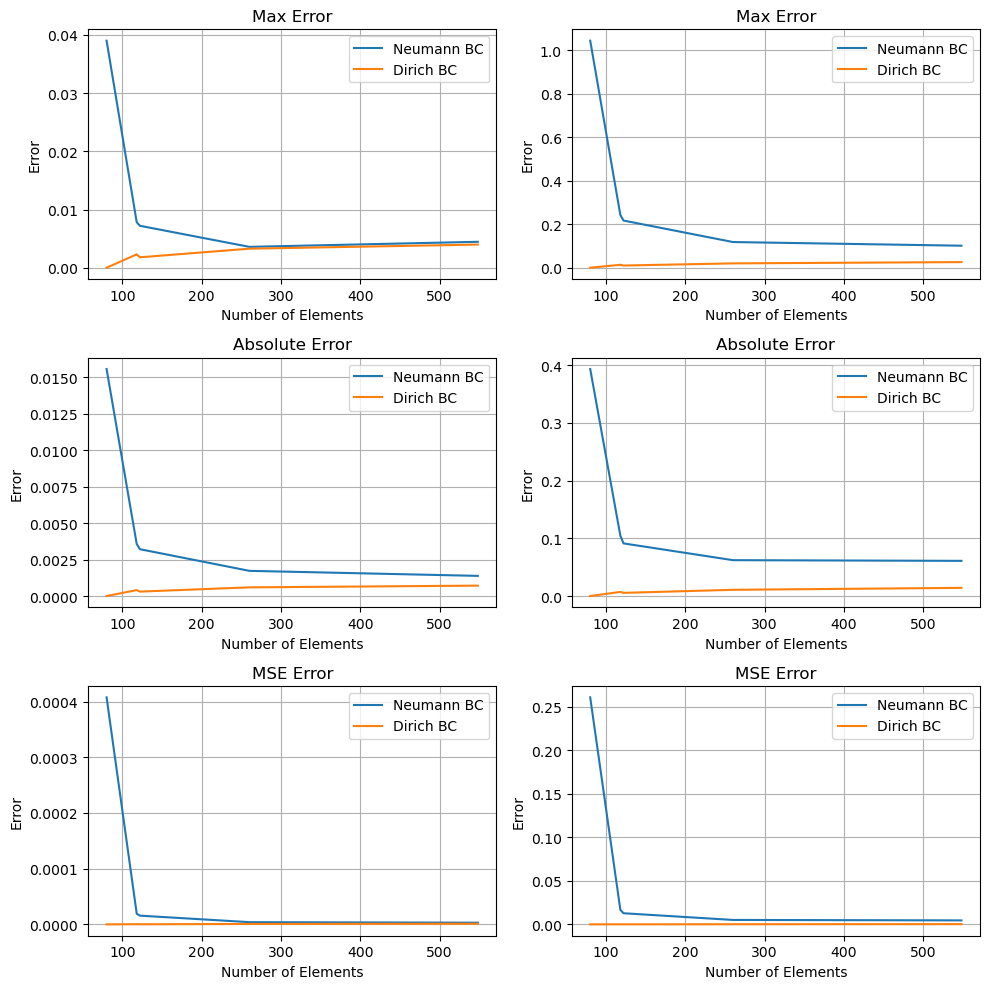

In [23]:
from FEM_Module.Run_Cantilever_Example import Run_Cantilever

element_sizes=[3.,2.2,2,1.45,0.9]

# ------------ Neumann Boundary Conditions ------------------------------------------#
errors_summary_x_N = []
errors_summary_y_N = []

for element_size in element_sizes:
    
    FEM_ = Run_Cantilever(domain_dim)

    ## Create the domain name
    FEM_.domain_mesh(element_degree, element_size, [x_start,x_end], [y_start,y_end])
    FEM_.accumulate_global_matrix(Youngs_modulus, Poisson_ratio)
    FEM_.apply_BC_NeumannDirich(P)
    FEM_.solve(FEM_.A_matrix,FEM_.b)

    errors_x, errors_y = FEM_.calculate_errors(P, L,c)
        
    errors_summary_x_N.append(errors_x)

    errors_summary_y_N.append(errors_y)

# ------------ Dirichlet Boundary Conditions ------------------------------------------#
errors_summary_x_D = []
errors_summary_y_D = []

for element_size in element_sizes:
    
    FEM_ = Run_Cantilever(domain_dim)

    ## Create the domain name
    FEM_.domain_mesh(element_degree, element_size, [x_start,x_end], [y_start,y_end])
    FEM_.accumulate_global_matrix(Youngs_modulus, Poisson_ratio)
    FEM_.apply_BC_Dirich(P)
    FEM_.solve(FEM_.A_matrix,FEM_.b)

    errors_x, errors_y = FEM_.calculate_errors(P, L,c)
        
    errors_summary_x_D.append(errors_x)
    errors_summary_y_D.append(errors_y)

# ------------ Plot the errors ------------------------------------------#

fig, axes = plt.subplots(3, 2, figsize=(10, 10))

errors_summary_x_D =np.array(errors_summary_x_D)
errors_summary_y_D =np.array(errors_summary_y_D)
errors_summary_x_N =np.array(errors_summary_x_N)
errors_summary_y_N =np.array(errors_summary_y_N)
# Define row titles for subtitles
row_titles = ["Max Error", "Absolute Error", "MSE Error"]

for fig_num in range(1, 4):
    axes[fig_num - 1][0].plot(errors_summary_x_N[:, 0], errors_summary_x_N[:, fig_num], label="Neumann BC")
    axes[fig_num - 1][1].plot(errors_summary_y_N[:, 0], errors_summary_y_N[:, fig_num], label="Neumann BC")
    axes[fig_num - 1][0].plot(errors_summary_x_D[:, 0], errors_summary_x_D[:, fig_num], label="Dirich BC")
    axes[fig_num - 1][1].plot(errors_summary_y_D[:, 0], errors_summary_y_D[:, fig_num], label="Dirich BC")
    for col in range(2):
    # Set subtitles for each row
        axes[fig_num - 1][col].set_title(row_titles[fig_num - 1])
        axes[fig_num - 1][col].set_xlabel("Number of Elements")
        axes[fig_num - 1][col].set_ylabel("Error")
        axes[fig_num - 1][col].grid(True)
        
    axes[fig_num - 1][0].legend()
    axes[fig_num - 1][1].legend()

plt.tight_layout()
plt.show()


### Final Note
The Finite Element Method is a powerful numerical technique that enables us to solve complex physical problems that would otherwise be impossible to solve. Beyond what has been presented here, the complexity of FEM solutions can further increase with:
- Coupled Problems: Solving multiple interacting quantities simultaneously, such as displacement and fluid pressure in hydromechanical simulations.

- Time-Dependent Problems: Using FEM at each time step while employing a time-stepping algorithm to evolve the solution over time.

- Alternative Basis Functions: While FEM traditionally uses polynomial basis functions, a growing field of study explores the use of B-spline basis functions, leading to Isogeometric Analysis (IGA), where the mesh consists of B-splines instead of standard finite elements.

There are also some challenges in using FEM, that have to be considered:

- Mesh Generation: FEM is highly mesh-dependent, especially for complex problems. Proper mesh refinement is crucial, as an incorrectly meshed domain can lead to inaccurate results. Mesh generation is an active areas of research and a good meshing tool can be costly.

- Computational Cost: High-resolution meshes for complex geometries lead to large linear systems that are computationally expensive to solve. They may require large memories or time to solve a problem to the required degree of accuracy.

- Numerical Instabilities: Poorly conditioned linear systems can arise from inadequate meshing or physical quantities with vastly different magnitudes, making the solution process difficult. Incorrectly stated boundary conditions can also lead to instabilities.

- Nonlinear Problems: FEM typically relies on forming a weak formulation of equations that are linear. However, many real-world problems, such as those involving friction, introduce nonlinearity, requiring additional numerical techniques to ensure convergence and stability.